<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_2/AST_Clase_2_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 2</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose

matplotlib.rcParams['figure.figsize']=[25,5] 


matplotlib.rcParams['figure.figsize']=[12.0,8.0] 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Leemos los datos a trabajar

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/Indice_precios.csv'
data = pd.read_csv(url)

In [ ]:
data.fecha = pd.to_datetime(data.fecha, dayfirst = True) 
data.set_index("fecha", inplace=True)

In [ ]:
data.head()

,IPC
fecha,
2017-01-31,1.3
2017-02-28,2.5
2017-03-31,2.4
2017-04-30,2.6
2017-05-31,1.3


In [ ]:
data=data.asfreq('m')

Transformaciones de la serie original

Differenciamos la serie original

In [ ]:
data_diff=data.copy()

In [ ]:
data_diff=data_diff.diff(axis = 0, periods = 1)

In [ ]:
data_diff.drop(['2017-01-31'], inplace=True)

In [ ]:
data_diff

,IPC
fecha,
2017-02-28,1.2
2017-03-31,-0.1
2017-04-30,0.2
2017-05-31,-1.3
2017-06-30,0.1
...,...
2022-01-31,0.1
2022-02-28,0.8
2022-03-31,2.0


Transformacion logaritmica de la serie original

In [ ]:
data_log=np.log(data)

In [ ]:
data_log.head()

,IPC
fecha,
2017-01-31,0.262364
2017-02-28,0.916291
2017-03-31,0.875469
2017-04-30,0.955511
2017-05-31,0.262364


Diferenciamos la serie que tenia una trasnformacion logaritmica

In [ ]:
data_log_diff=data_log.copy ()

In [ ]:
data_log_diff=data_log_diff.diff(axis = 0, periods = 1)

In [ ]:
data_log_diff.drop(['2017-01-31'],inplace=True)

In [ ]:
data_log_diff.head()

,IPC
fecha,
2017-02-28,0.653926
2017-03-31,-0.040822
2017-04-30,0.080043
2017-05-31,-0.693147
2017-06-30,0.074108


# Graficos de la serie

Descomposicion Aditiva de la serie original

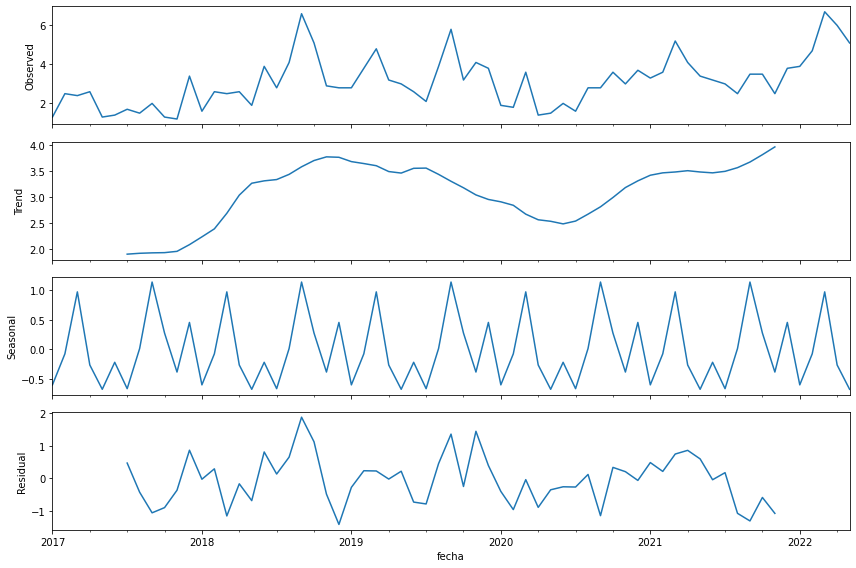

In [ ]:
s_dec_additive = seasonal_decompose(data.IPC, model = "adittive")
s_dec_additive.plot()
plt.show()

Descomposicion Multiplicativa de la serie original

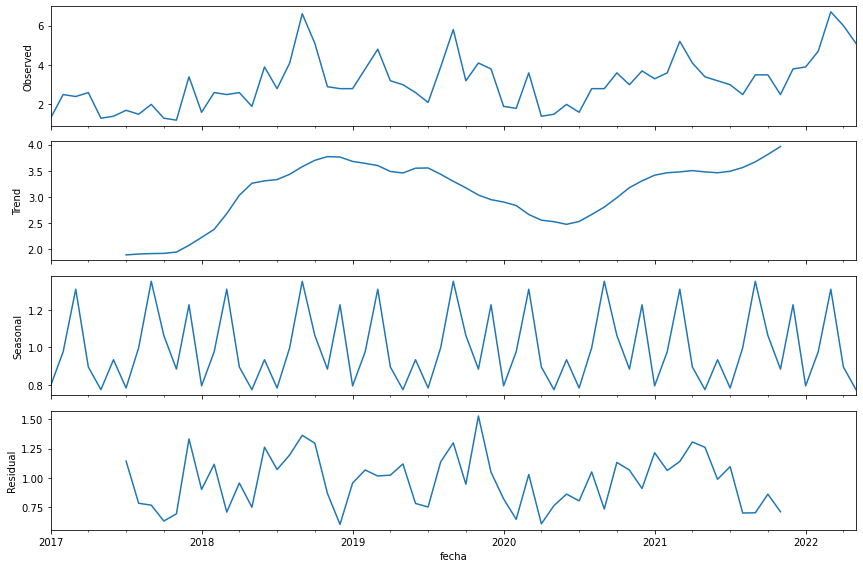

In [ ]:
s_dec_multiplicative = seasonal_decompose(data.IPC, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

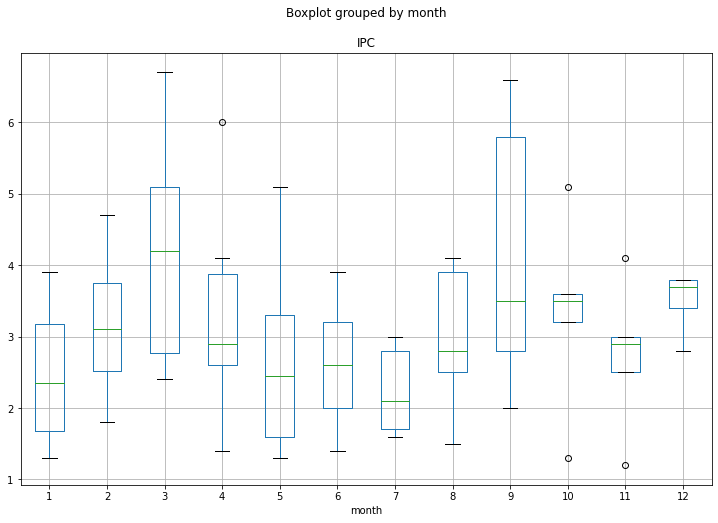

In [ ]:
#  Boxplot  de la serie original agrupado por meses
data.assign(month=data.index.month).boxplot(
    column='IPC', by='month')

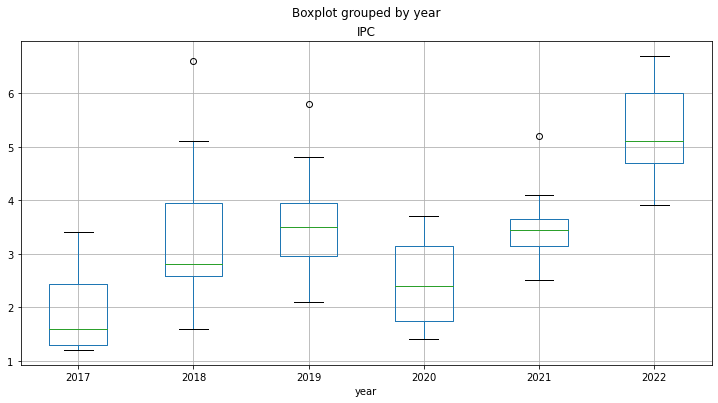

In [ ]:
# Boxplot  de la serie original agrupado por años
data.assign(year=data.index.year).boxplot(
    column='IPC', by='year', figsize=(12, 6))

# PLOTEOS DE LAS DISTINTAS SERIES =
# - Evolucion de los datos en el tiempo 
# - Graficos de la funcion de autocorrelacion ("ACF PLOT") 
# - Autocorrelacion parcial ("PACF PLOT") 

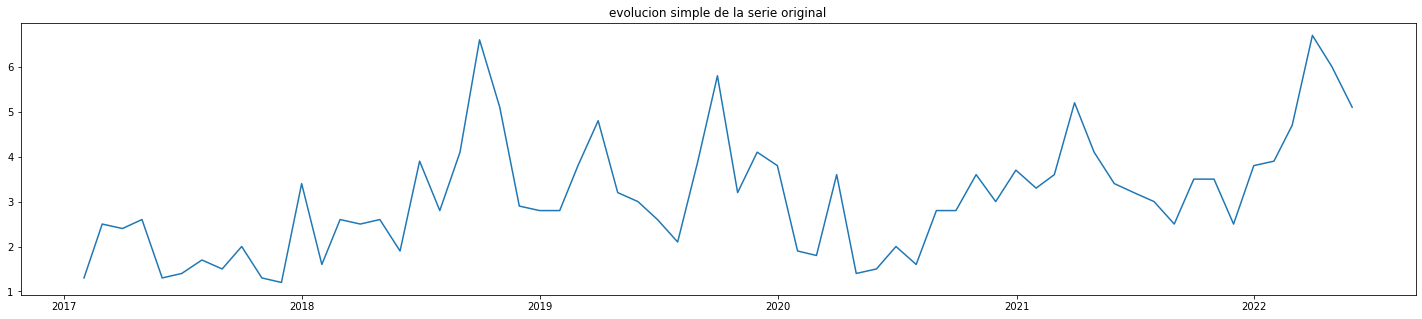

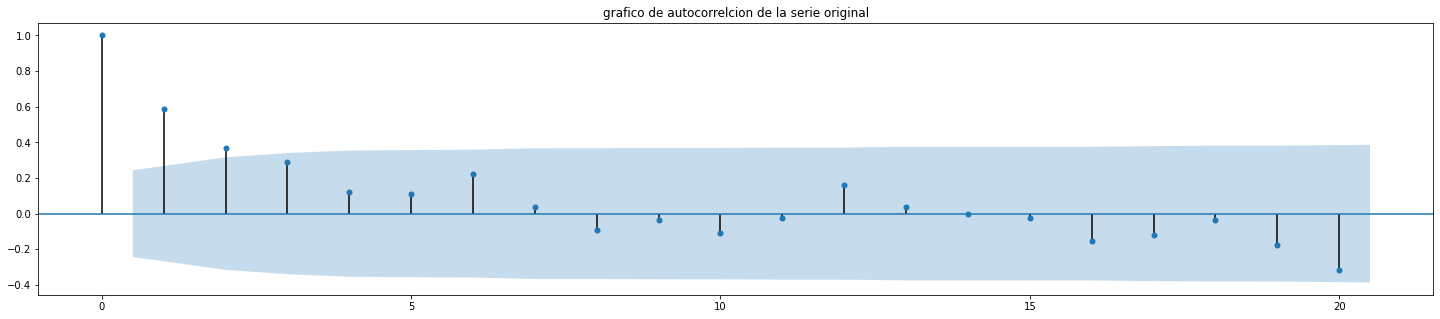

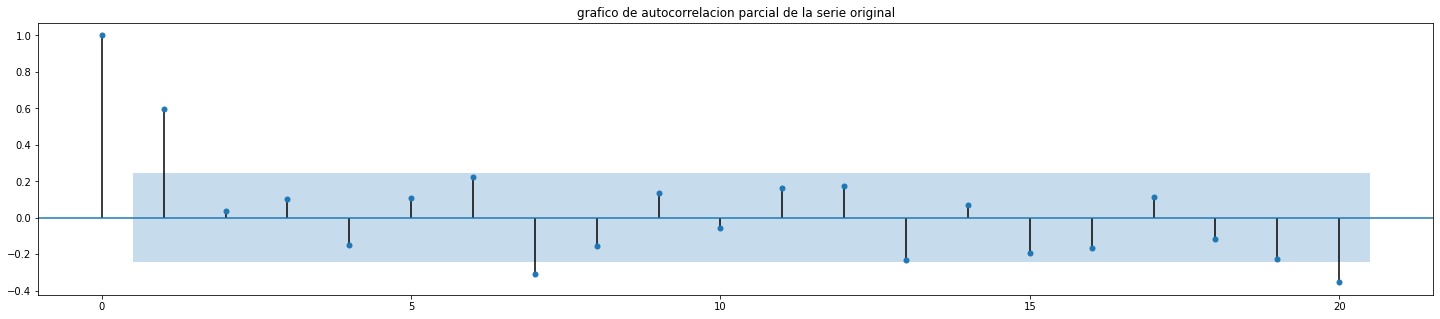

In [ ]:
# Serie original
matplotlib.rcParams['figure.figsize']=[25,5] 

plt.plot(data.IPC, linewidth=1.5)
plt.title("evolucion simple de la serie original");
plot_acf(data.IPC,lags=20,title="grafico de autocorrelcion de la serie original")
plot_pacf(data.IPC,lags=20,title="grafico de autocorrelacion parcial de la serie original")
plt.show()

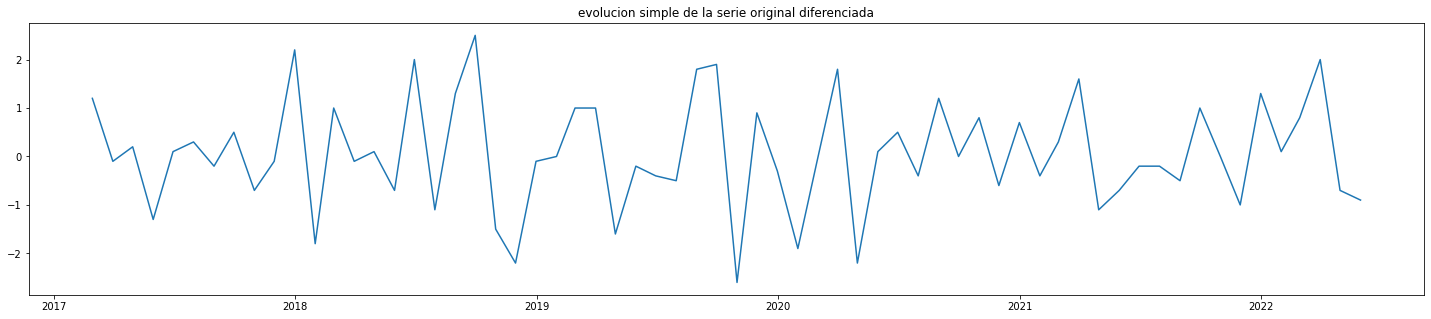

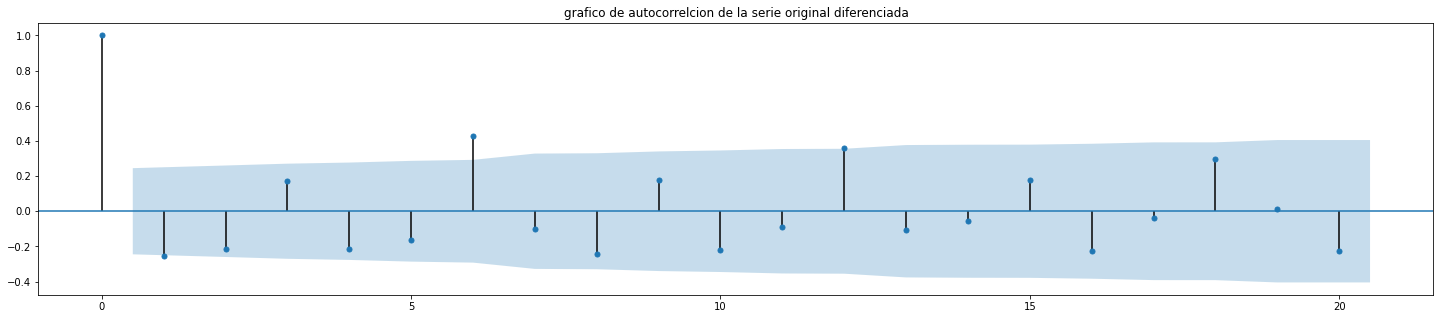

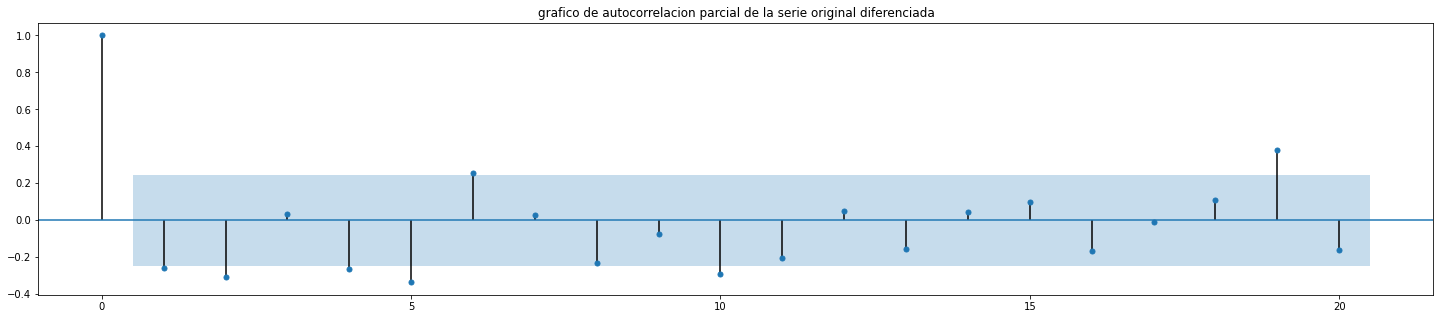

In [ ]:
# Serie original diferenciada

plt.plot(data_diff.IPC, linewidth=1.5)
plt.title("evolucion simple de la serie original diferenciada");
plot_acf(data_diff.IPC,lags=20,title="grafico de autocorrelcion de la serie original diferenciada")
plot_pacf(data_diff.IPC,lags=20,title="grafico de autocorrelacion parcial de la serie original diferenciada")
plt.show()

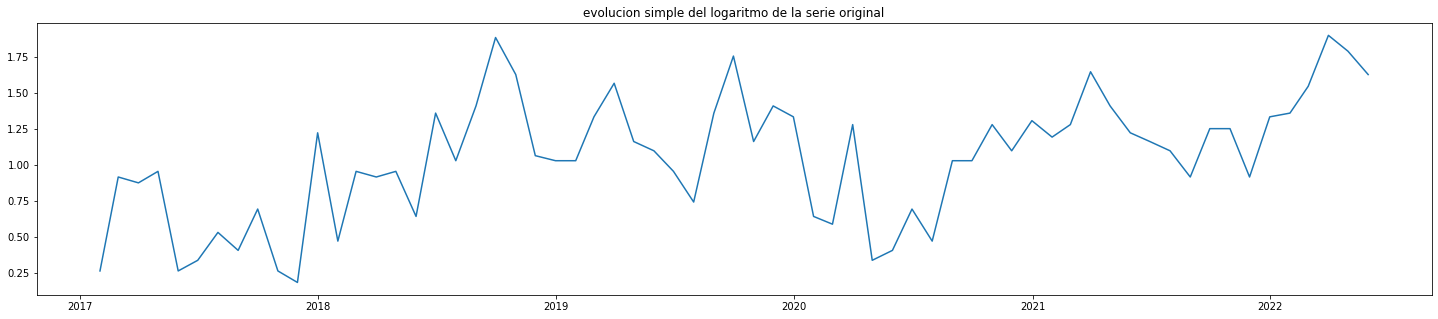

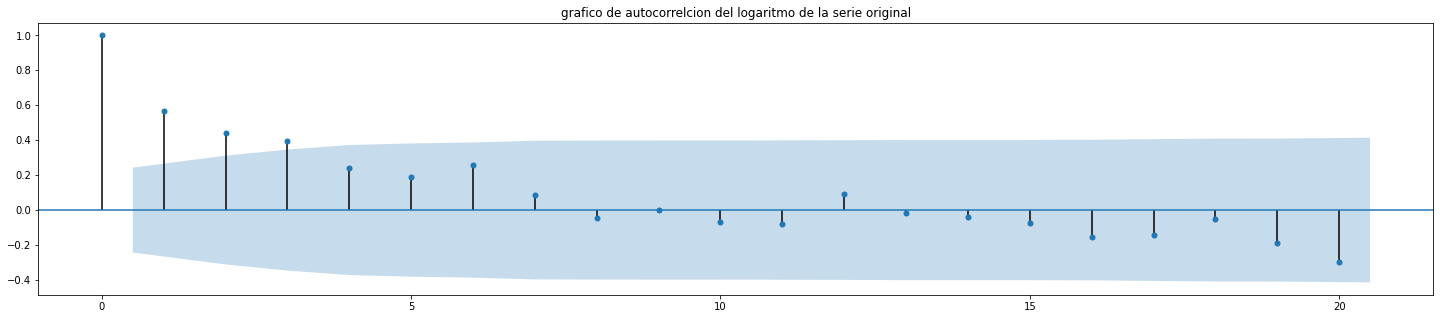

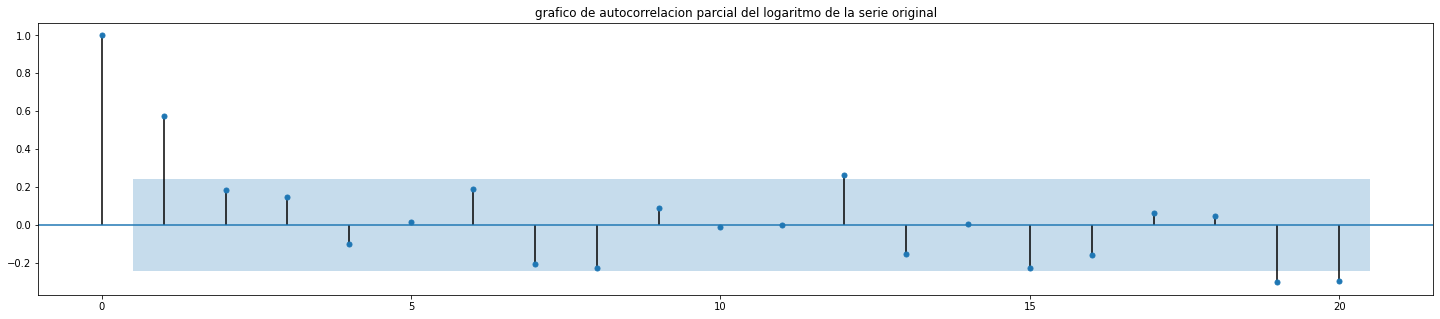

In [ ]:
# Serie original diferenciada

plt.plot(data_log.IPC, linewidth=1.5)
plt.title("evolucion simple del logaritmo de la serie original");
plot_acf(data_log.IPC,lags=20,title="grafico de autocorrelcion del logaritmo de la serie original")
plot_pacf(data_log.IPC,lags=20,title="grafico de autocorrelacion parcial del logaritmo de la serie original")
plt.show()


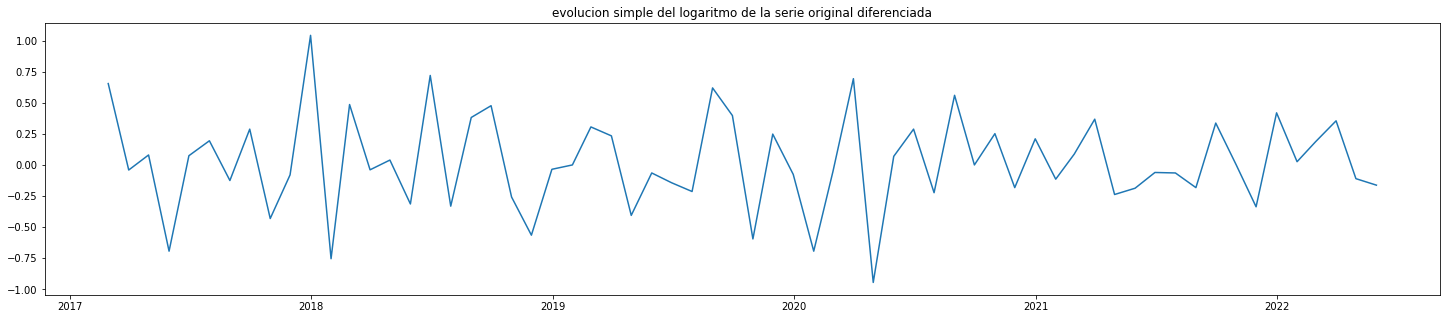

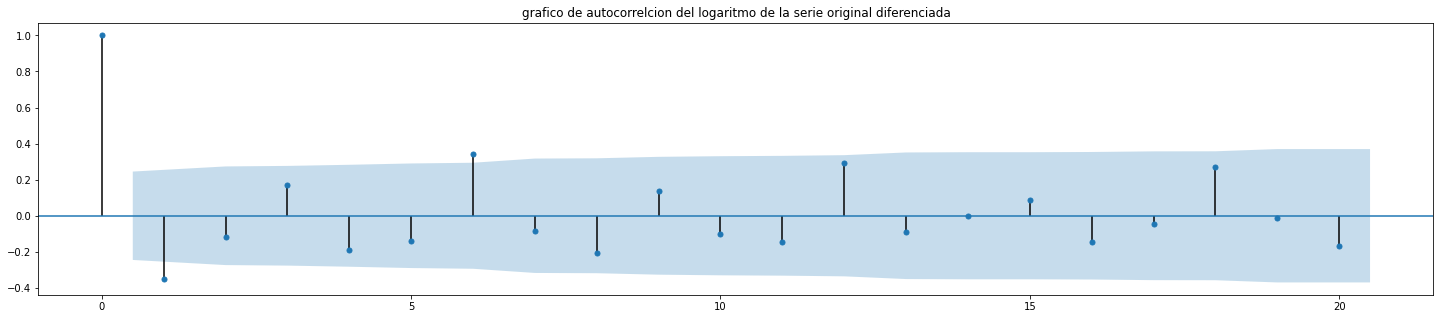

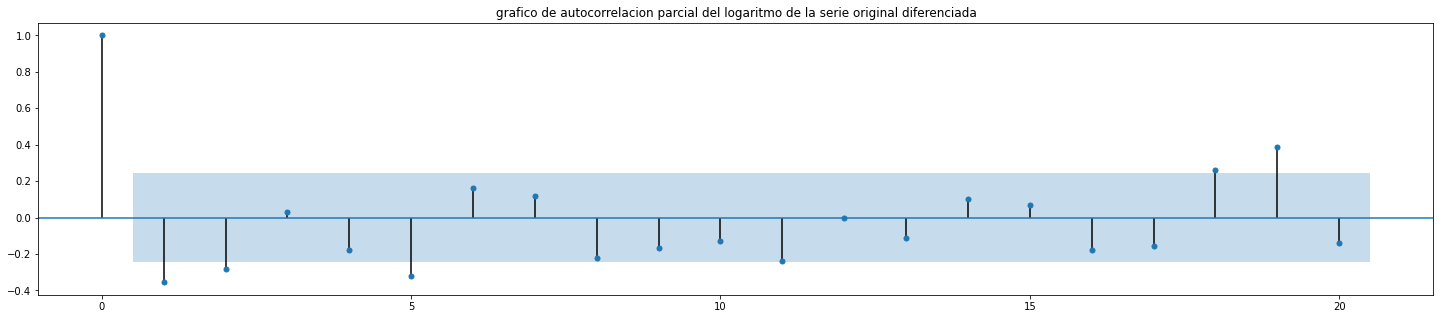

In [ ]:
#Ploteo simple de la serie original con trasnformacion logaritmica

plt.plot(data_log_diff.IPC, linewidth=1.5)
plt.title("evolucion simple del logaritmo de la serie original diferenciada");
plot_acf(data_log_diff.IPC,lags=20,title="grafico de autocorrelcion del logaritmo de la serie original diferenciada")
plot_pacf(data_log_diff.IPC,lags=20,title="grafico de autocorrelacion parcial del logaritmo de la serie original diferenciada")
plt.show()

FIN DEL CODIGO, GRACIAS POR SU ATENCION 😀